# Homework 09
研究有取向的布朗粒子（如纳米棒）的随机行走，计算取向的自关联函数：$C(t)=\left\langle u_{x}(t) u_{x}(0)\right\rangle$，其中 u x 为取向单位矢量在 x 轴上的投影

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import multiprocessing as mp
import time
import threading
%matplotlib inline

In [41]:
N = int(1e5)
T = 1000
step = 0.1
num_t = 10


def one_run(n, lock, covs):
    local_covs = []
    for row in range(n):
        theta_0 = np.random.rand(1) * np.pi * 2
        u0 = np.cos(theta_0)
        rands = np.random.randint(-1, high=2, size=T)
        cov = []
        theta_sum = theta_0
        for col, r in enumerate(rands):
            cov.append(np.cos(theta_sum) * u0)
            theta_sum += r * step
        local_covs.append(cov)

    lock.acquire()
    try:
        covs.append(np.mean(local_covs, axis=0))
    finally:
        lock.release()

start = time.time()      
n = N // num_t
ts = []
lock = mp.Lock()
share_covs = mp.Manager().list()
for t in range(num_t):
    t = mp.Process(target=one_run, args=(n, lock, share_covs))
    ts.append(t)

for t in ts:
    t.start()

for t in ts:
    t.join()


covs = np.mean(share_covs, axis=0)
print(time.time() - start, covs.shape)

144.32639408111572 (1000, 1)


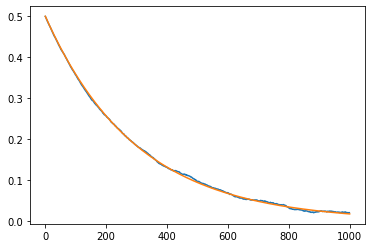

In [49]:
x = np.arange(0, 1001, 1)
y = 0.5 * np.exp(-x / 300)
plt.plot(covs)
plt.plot(x, y)
plt.show()